# Ejemplo de ajuste (distribución gamma)

**Generamos una muestra según una distribución $\Gamma$ con parámetros $\lambda=0.5$ y $\alpha=3.5$.**

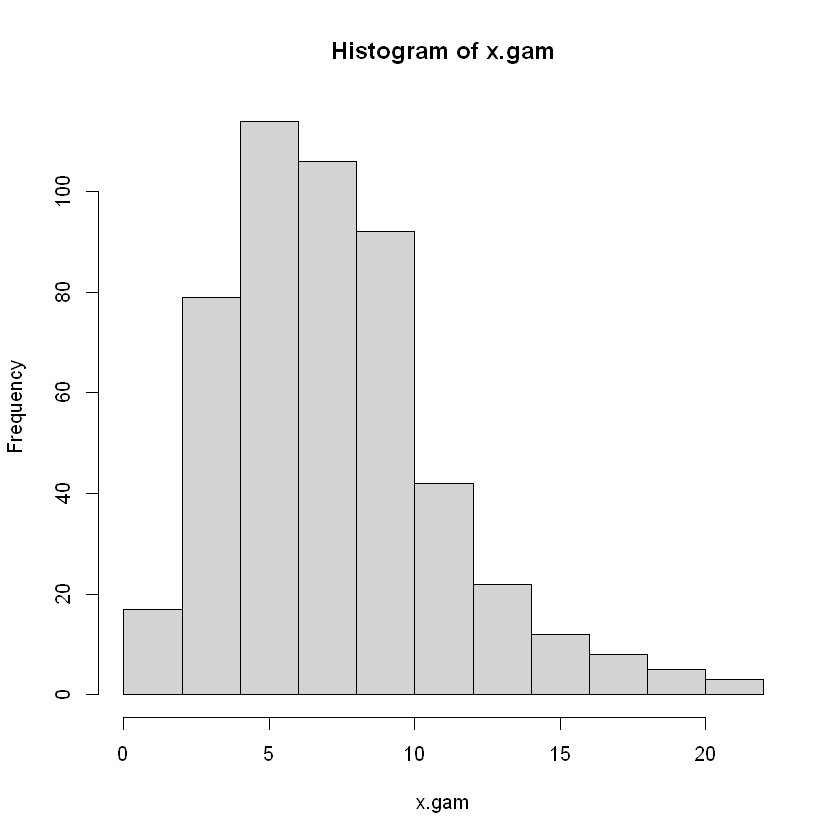

In [1]:
x.gam <-rgamma(500, rate=0.5, shape=3.5)
hist(x.gam)

**A continuación ajustaremos los parámetros utilizando el método de máximo likelihood, mle(). Recordemos que la PDF es:**

\begin{equation*}
\frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}
\end{equation*}

**Con mle(), hemos de escribir explícitamente la expresión del -log Likelihood (LL). Y como valores iniciales de los parámetros, escogemos, arbitrariamente (suponiendo que desconocemos el valor usado en la generación), $\lambda=2$, $\alpha=1$.**

In [4]:
library(stats4)
LL<-function(lambda, alpha){
    n=500
    x<-x.gam
    -n*alpha*log(lambda)+n*log(gamma(alpha))-(alpha-1)*sum(log(x))+lambda*sum(x)
}
fit <-mle(minuslog=LL, method = "L-BFGS-B", start = list(lambda = 2, alpha=1), lower = c(0.01, 0.01), upper = c(Inf, Inf))
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = 2, alpha = 1), method = "L-BFGS-B", 
    lower = c(0.01, 0.01), upper = c(Inf, Inf))

Coefficients:
        Estimate Std. Error
lambda 0.5154064 0.03345387
alpha  3.7148126 0.22518879

-2 log L: 2641.964 

**Hemos obtenido del ajuste $\lambda=0.515\pm0.033$ y $\alpha=3.71\pm0.23$.**

**Podríamos haber estimado un valor inicial de los parámetros utilizando el método de los momentos.**

In [5]:
media = mean(x.gam)
varianza = var(x.gam)
lambda_estimada = media/varianza
alpha_estimada = media^2/varianza
lambda_estimada
alpha_estimada

[1] 0.5147223

[1] 3.709888

**Hemos obtenido $\lambda=0.51$ y $\alpha=3.71$. Si los usamos como imput:**

In [6]:
fit2 <-mle(minuslog=LL, start = list(lambda = lambda_estimada, alpha=alpha_estimada), lower = c(0.01, 0.01))
summary(fit2)

Maximum likelihood estimation

Call:
mle(minuslogl = LL, start = list(lambda = lambda_estimada, alpha = alpha_estimada), 
    lower = c(0.01, 0.01))

Coefficients:
        Estimate Std. Error
lambda 0.5154134 0.03345431
alpha  3.7148646 0.22519207

-2 log L: 2641.964 

**En este caso, llegamos al mismo mínimo, pero en casos más complejos, podríamos haber ido a parar a un mínimo local, y por ello se recomienda cierta precaución respecto a los valores iniciales.**

**A continuación podemos ajustar, también maximizando el likelihood, usando fitdist(). En este caso, le podemos dar simplemente la PDF que queremos ajustar.**

In [7]:
#library(MASS)
require(fitdistrplus)
fit3 <-fitdist(x.gam, "gamma")

Loading required package: fitdistrplus

Loading required package: MASS

Loading required package: survival



In [8]:
fit3

Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters:
       estimate Std. Error
shape 3.7155241 0.22523364
rate  0.5154843 0.03345874

**Obtenemos el mismo resultado que antes, ya que el método utilizado es el mismo. Además podemos obtener gráficas que comparan el ajuste con los datos:** 

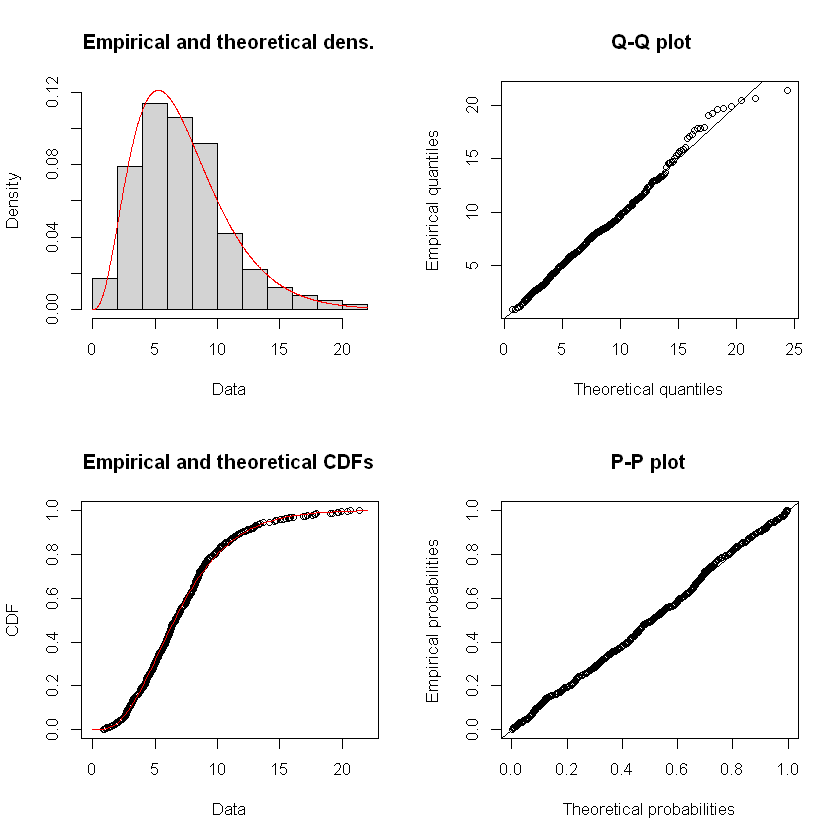

In [9]:
plotdist(x.gam,"gamma",para=list(shape=fit3$estimate[1],rate=fit3$estimate[2]))

**Si queremos obtener el valor del log likelihood:**

In [10]:
fit3$loglik

[1] -1320.982

**Podemos aplicar tests sobre la calidad del ajuste:** 

In [11]:
gofstat(fit3)

Goodness-of-fit statistics
                             1-mle-gamma
Kolmogorov-Smirnov statistic  0.03105310
Cramer-von Mises statistic    0.07522255
Anderson-Darling statistic    0.46494059

Goodness-of-fit criteria
                               1-mle-gamma
Akaike's Information Criterion    2645.964
Bayesian Information Criterion    2654.393

**Los tests de K-S, Cramer-von Mises y Anderson-Darling, calculan la bondad de ajuste en base a las funciones acumuladas (el segundo a partir de las diferencias al cuadrado y el tercero teniendo más peso las discrepancias en las colas). Se deben obtener valores pequeños, si el ajuste es bueno.
AIC y BIC se calculan a partir del likelihood y el número de parámetros del modelo. Al comparar diferentes modelos, aquellos con un menor valor de AIC y BIC serán aquellos que ajusten mejor los datos.**

**Finalmente, podemos usar la función nls() para el ajuste, basada en el método de mínimos cuadrados.**

[1]  2 15 38 41 55 59 60 46 60 32 22 20 13  9  6  6  2  6  0  5  2  1

[1]  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5
[16] 15.5 16.5 17.5 18.5 19.5 20.5 21.5

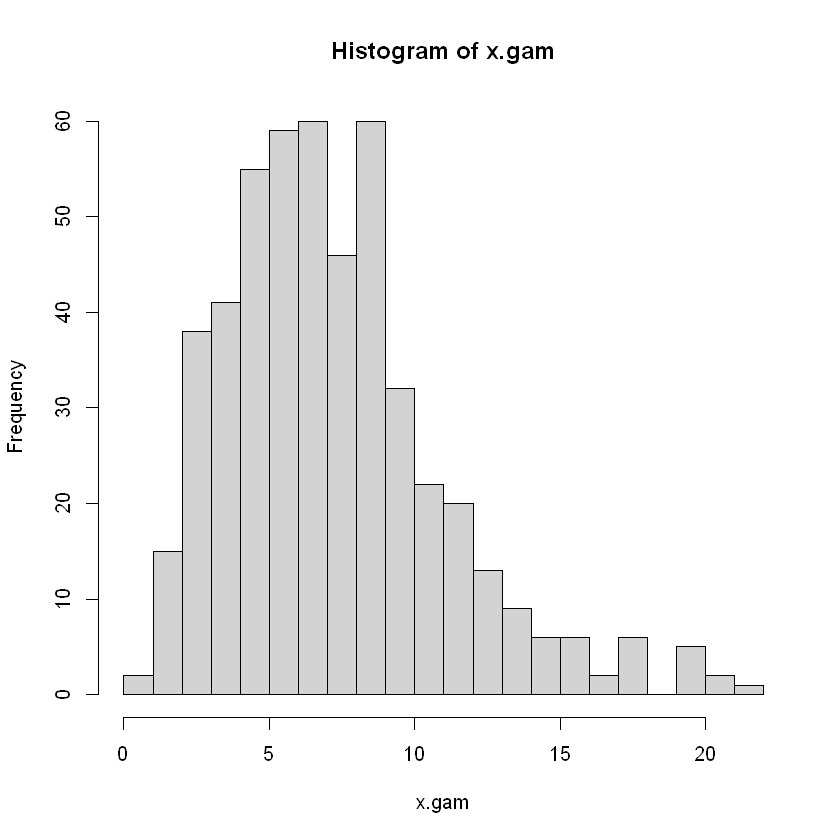

In [13]:
hdata <- hist(x.gam, breaks=20)
hdata$counts
hdata$mids

In [14]:
x<-hdata$mids
y <- hdata$counts

In [15]:
fit4 <- nls(y~b*(lb^a)/gamma(a)*x^(a-1)*exp(-lb*x), start=list(lb=0.5,a=3, b=500))

In [16]:
summary(fit4)


Formula: y ~ b * (lb^a)/gamma(a) * x^(a - 1) * exp(-lb * x)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
lb   0.5215     0.0543   9.604 1.00e-08 ***
a    3.8142     0.3321  11.486 5.41e-10 ***
b  499.7089    22.6269  22.085 5.21e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.246 on 19 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 2.085e-06


**Obtenemos del ajuste $\lambda=0.52\pm0.05$ y $\alpha=3.81\pm0.33$.**

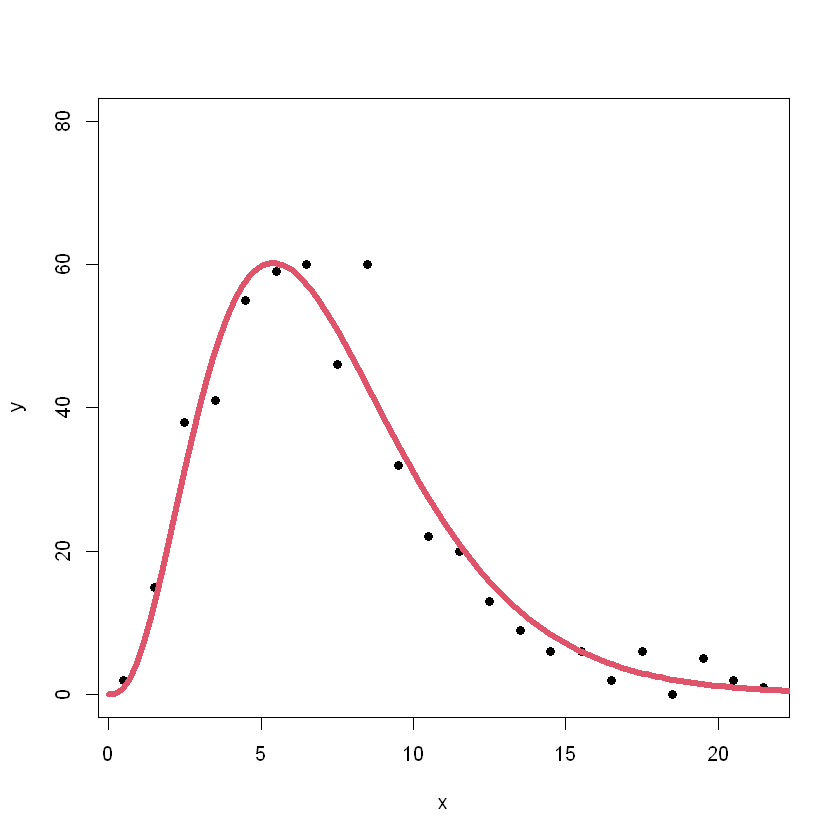

In [22]:
plot(x,y, ylim=c(0, 80), pch=19)
par1 = coef(fit4)[1]
par2 = coef(fit4)[2]
par3 = coef(fit4)[3]
curve(par3*(par1^par2)/gamma(par2)*x^(par2-1)*exp(-par1*x), 0, 23, add=T, col=2, lwd=5)